### Import Libraries.

In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive

In [3]:
!ls /content/drive/MyDrive/Capstone_project

COVID  list.obj  non-COVID


In [4]:
import os

In [5]:
for dirpath, dirnames, filenames in os.walk('Capstone_project'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [6]:
num_covid_images = len(os.listdir('/content/drive/MyDrive/Capstone_project/COVID'))
num_normal_images = len(os.listdir('/content/drive/MyDrive/Capstone_project/non-COVID'))

In [7]:
num_covid_images, num_normal_images

(1252, 1229)

In [8]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Capstone_project')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names[0], class_names[2])

COVID non-COVID


In [9]:
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):

  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape: {img.shape}")

  return img

Image shape: (286, 357, 4)


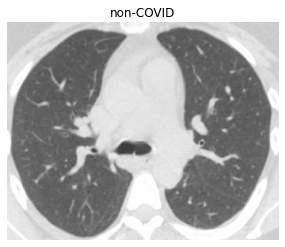

In [10]:
img  = view_random_image('/content/drive/MyDrive/Capstone_project', 'non-COVID')

Image shape: (300, 401, 4)


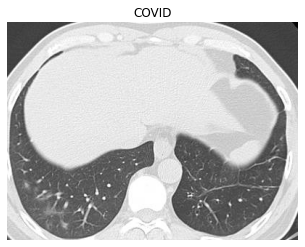

In [11]:
img = view_random_image('/content/drive/MyDrive/Capstone_project', 'COVID')

In [12]:
img

array([[[0.27450982, 0.27450982, 0.27450982, 1.        ],
        [0.25882354, 0.25882354, 0.25882354, 1.        ],
        [0.23529412, 0.23529412, 0.23529412, 1.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 1.        ],
        [0.00392157, 0.00392157, 0.00392157, 1.        ],
        [0.00392157, 0.00392157, 0.00392157, 1.        ]],

       [[0.21568628, 0.21568628, 0.21568628, 1.        ],
        [0.24705882, 0.24705882, 0.24705882, 1.        ],
        [0.27450982, 0.27450982, 0.27450982, 1.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 1.        ],
        [0.00392157, 0.00392157, 0.00392157, 1.        ],
        [0.00392157, 0.00392157, 0.00392157, 1.        ]],

       [[0.24705882, 0.24705882, 0.24705882, 1.        ],
        [0.24705882, 0.24705882, 0.24705882, 1.        ],
        [0.24705882, 0.24705882, 0.24705882, 1.        ],
        ...,
        [0.01568628, 0.01568628, 0.01568628, 1.        ],
        [0.00392157, 0.003921

> 🔑**Note:** The images have already been preprocessed which means it has been scaled (also referred to as normalize) their pixel values by deviding the image array by 255

In [13]:
datagen1 = ImageDataGenerator(rescale=1/255.)

In [14]:
training_augmented_datagen = ImageDataGenerator(rescale=1/255.,shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_data = training_augmented_datagen.flow_from_directory(directory='/content/drive/MyDrive/Capstone_project',
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size=32,
                                         subset = 'training',
                                         shuffle=False)

test_data = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/Capstone_project',
                                         target_size=(224,224),
                                         class_mode='binary',
                                        batch_size=32,
                                         subset = 'validation',
                                         shuffle=True)


Found 1985 images belonging to 2 classes.
Found 495 images belonging to 2 classes.


In [18]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [55]:
train_data.image_shape

(224, 224, 3)

In [49]:
augmented_images, augmented_labels = train_data.next()

showing image number: 26


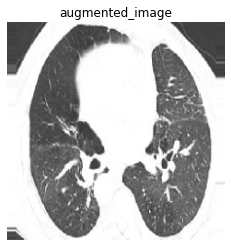

In [51]:
import random
random_number = random.randint(0, 32) 
print(f"showing image number: {random_number}")
plt.imshow(augmented_images[random_number])
plt.title(f"augmented_image")
plt.axis(False);

In [130]:
def plot_loss_curves(history):
  """
  Returns separate loss curves forr training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [69]:
base_model = Sequential()

# Filters, size of filters, paddings, activation_function, input_shape
base_model.add(Conv2D(32, 3, padding='Same', activation='relu', input_shape=(224,224,3)))
base_model.add(Conv2D(32, 3, padding='Same', activation='relu'))
# pooling layer
base_model.add(MaxPooling2D(pool_size=(2,2)))
# Place a Dropout layer
base_model.add(Dropout(0.5))
# Add another conv layer
base_model.add(Conv2D(64, 3, padding='Same', activation='relu'))
# pooling layer
base_model.add(Conv2D(64, 3, padding='Same', activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
base_model.add(Dropout(0.5))
# Flatten layer
base_model.add(Flatten())
# Add a Dense layer
base_model.add(Dense(100, activation='relu'))

# place a dropout layer
# 0.5 is recommended, half input nodes will be dropped at each update
base_model.add(Dense(1, activation='sigmoid'))
base_model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

In [70]:
base_model.compile(optimizer=Adam(0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [73]:
base_model_history = base_model.fit(train_data,
                                    epochs=30,
                                    validation_data=test_data,
                                    steps_per_epoch=len(train_data),
                                    validation_steps=len(test_data))

Epoch 1/30
63/63 [==============================] - 39s 611ms/step - loss: 0.6933 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.4949
Epoch 2/30
63/63 [==============================] - 42s 659ms/step - loss: 0.6934 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.4949
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4957

KeyboardInterrupt: ignored

In [75]:
import tensorflow as tf

In [76]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_history = model_1.fit(train_data,
                                    epochs=30,
                                    validation_data=test_data,
                                    steps_per_epoch=len(train_data),
                                    validation_steps=len(test_data))

Epoch 1/30
63/63 [==============================] - 39s 564ms/step - loss: 0.7251 - accuracy: 0.4458 - val_loss: 0.6927 - val_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - 39s 616ms/step - loss: 0.6934 - accuracy: 0.4751 - val_loss: 0.6927 - val_accuracy: 0.5758
Epoch 3/30
63/63 [==============================] - 37s 594ms/step - loss: 0.7114 - accuracy: 0.5547 - val_loss: 0.6912 - val_accuracy: 0.4949
Epoch 4/30
63/63 [==============================] - 35s 560ms/step - loss: 0.6948 - accuracy: 0.4997 - val_loss: 0.6906 - val_accuracy: 0.4929
Epoch 5/30
63/63 [==============================] - 36s 578ms/step - loss: 0.6888 - accuracy: 0.6010 - val_loss: 0.6839 - val_accuracy: 0.5051
Epoch 6/30
63/63 [==============================] - 37s 591ms/step - loss: 0.7003 - accuracy: 0.4826 - val_loss: 0.6920 - val_accuracy: 0.6101
Epoch 7/30
63/63 [==============================] - 38s 599ms/step - loss: 0.6944 - accuracy: 0.4927 - val_loss: 0.6918 - val_accuracy: 0.4970

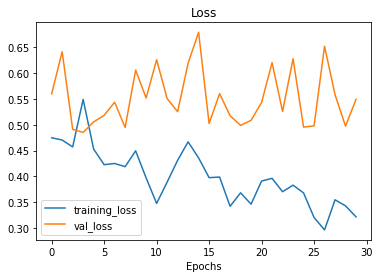

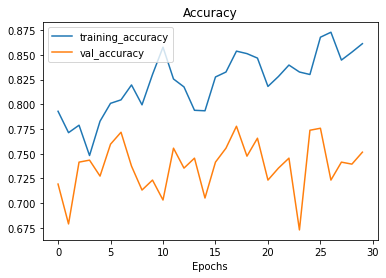

In [131]:
plot_loss_curves(model_1_history)

# Feature Extraction 

## Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [93]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [80]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [88]:
IMAGE_SHAPE = (224,224)

In [115]:

def create_model(model_url, num_classes=2):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    Dense(num_classes, activation='sigmoid', name='output_layer'), # create our own output layer      
    Flatten()
  ])

  return model
     

In [116]:
train_data.num_classes

2

In [117]:
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

In [118]:
resnet_history = resnet_model.fit(train_data,
                                    epochs=30,
                                    validation_data=test_data,
                                    steps_per_epoch=len(train_data),
                                    validation_steps=int(0.25 * len(test_data)))

Epoch 1/30
63/63 [==============================] - 40s 554ms/step - loss: 0.8684 - accuracy: 0.5093 - val_loss: 0.6952 - val_accuracy: 0.4531
Epoch 2/30
55/63 [=========================>....] - ETA: 4s - loss: 0.5466 - accuracy: 0.5228

KeyboardInterrupt: ignored

# Fine-Tuning 

## resnet_model_1 : Feature extracted model with ResNet RS-152

In [ ]:
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_data = datagen.flow_from_directory(directory='/content/drive/MyDrive/Capstone_project',
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size=32,
                                         subset = 'training',
                                         shuffle=False)

test_data = datagen.flow_from_directory(directory='/content/drive/MyDrive/Capstone_project',
                                         target_size=(224,224),
                                         class_mode='binary',
                                        batch_size=32,
                                         subset = 'validation',
                                         shuffle=True)

In [137]:
### Creating a model checkpoint
checkpoint_path = "resnet_models_checkpoints_weights.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [147]:
from tensorflow.keras.layers.experimental import preprocessing
# Build a data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2)               
], name="data_augmentation")

# 1. Create a base model  with tf.keras.applications
base_model = tf.keras.applications.ResNetRS152(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = layers.Input(shape=(224,224,3), name='input_layer')
# 4. Pass the inputs into the augmentation layer
x = data_augmentation(inputs)

# 4. Pass the iputs to the base model
x = base_model(inputs, training=False)

# 5. Average pool the outputs of the base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
# 6. Create an output activation layer
outputs = layers.Dense(1, activation= 'sigmoid', name='output_layer')(x)
# 7. Combine the inputs with the outputs into a model
resnet_model_1 = tf.keras.Model(inputs, outputs)
# 8. Compile the model
resnet_model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_resnet_model_1 = resnet_model_1.fit(train_data,
                                            epochs=10,
                                            validation_data=test_data,
                                            steps_per_epoch=len(train_data),
                                            validation_steps=int(0.25 * len(test_data)),
                                            callbacks= [checkpoint_callback])


TypeError: ignored

In [127]:
# check layers in our base model 
for layers_number, layer in enumerate(base_model.layers):

0 input_4
1 rescaling_3
2 normalization_3
3 zero_padding2d_15
4 stem_4_stem_conv_1
5 stem_4_stem_batch_norm_1
6 stem_4_stem_act_1
7 stem_4_stem_conv_2
8 stem_4_stem_batch_norm_2
9 stem_4_stem_act_2
10 stem_4_stem_conv_3
11 stem_4_stem_batch_norm_3
12 stem_4_stem_act_3
13 zero_padding2d_16
14 stem_4_stem_conv_4
15 stem_4_stem_batch_norm_4
16 stem_4_stem_act_4
17 BlockGroup2__block_0__conv_1
18 BlockGroup2__block_0_batch_norm_1
19 BlockGroup2__block_0__act_1
20 BlockGroup2__block_0__conv_2
21 BlockGroup2__block_0__batch_norm_2
22 BlockGroup2__block_0__act_2
23 BlockGroup2__block_0__conv_3
24 BlockGroup2__block_0__batch_norm_3
25 BlockGroup2__block_0__se_se_squeeze
26 BlockGroup2__block_0__se_se_reshape
27 BlockGroup2__block_0__se_se_reduce
28 BlockGroup2__block_0__se_se_expand
29 BlockGroup2__block_0__projection_conv
30 BlockGroup2__block_0__se_se_excite
31 BlockGroup2__block_0__projection_batch_norm
32 add_150
33 BlockGroup2__block_0__output_act
34 BlockGroup2__block_1__conv_1
35 BlockG

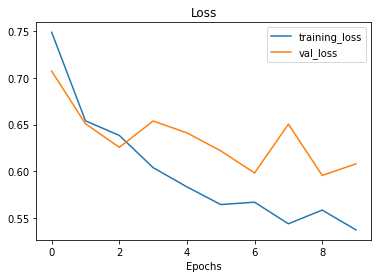

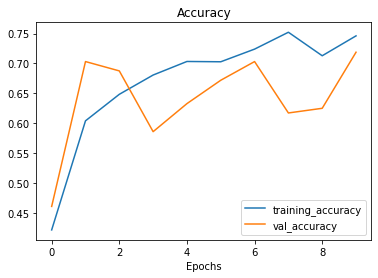

In [144]:
plot_loss_curves(history_resnet_model_1)

In [154]:
# Load in saved model weights and evaluate model
resnet_model_1.load_weights(checkpoint_path)
laoded_weights_model_results = resnet_model_1.evaluate(test_data)

16/16 [==============================] - 6s 337ms/step - loss: 0.6149 - accuracy: 0.6788


## Model_2 = Fine_tuning an existing model  

In [148]:
resnet_model_1.layers

In [149]:
resnet_model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet-rs-152 (Functional)  (None, None, None, 2048)  84724256  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 84,726,305
Trainable params: 2,049
Non-trainable params: 84,724,256
_________________________________________________________________


In [150]:
# How many layers are trainable in our resnet model?
print(len(resnet_model_1.layers[1].trainable_variables))

0


In [152]:
# How many layers are trainable in our base resnet rs 152 model?
print(len(base_model.trainable_variables))

0


In [153]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_7 False
2 normalization_7 False
3 zero_padding2d_35 False
4 stem_8_stem_conv_1 False
5 stem_8_stem_batch_norm_1 False
6 stem_8_stem_act_1 False
7 stem_8_stem_conv_2 False
8 stem_8_stem_batch_norm_2 False
9 stem_8_stem_act_2 False
10 stem_8_stem_conv_3 False
11 stem_8_stem_batch_norm_3 False
12 stem_8_stem_act_3 False
13 zero_padding2d_36 False
14 stem_8_stem_conv_4 False
15 stem_8_stem_batch_norm_4 False
16 stem_8_stem_act_4 False
17 BlockGroup2__block_0__conv_1 False
18 BlockGroup2__block_0_batch_norm_1 False
19 BlockGroup2__block_0__act_1 False
20 BlockGroup2__block_0__conv_2 False
21 BlockGroup2__block_0__batch_norm_2 False
22 BlockGroup2__block_0__act_2 False
23 BlockGroup2__block_0__conv_3 False
24 BlockGroup2__block_0__batch_norm_3 False
25 BlockGroup2__block_0__se_se_squeeze False
26 BlockGroup2__block_0__se_se_reshape False
27 BlockGroup2__block_0__se_se_reduce False
28 BlockGroup2__block_0__se_se_expand False
29 BlockGroup2__block_0__projection_conv

In [155]:
# Let's begin fine-tuning 
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layers.trainable = False

# Recompile
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(lr=0.0001), # lr is 10x lowwer than before for fine-tuning
                metrics=['accuracy'])

In [156]:
fine_tune_epochs = 10 + 10 # 10 being the initial epoch value we used for feature extraction

history_fine_resnet_model_2 = resnet_model_1.fit(train_data,
                                            epochs=fine_tune_epochs,
                                            validation_data=test_data,
                                            steps_per_epoch=len(train_data),
                                            validation_steps=int(0.25 * len(test_data)),
                                            callbacks= [checkpoint_callback])

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 0.5230 - accuracy: 0.7622
Epoch 1: saving model to resnet_models_checkpoints_weights.ckpt
63/63 [==============================] - 22s 349ms/step - loss: 0.5230 - accuracy: 0.7622 - val_loss: 0.6148 - val_accuracy: 0.6719
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 0.5233 - accuracy: 0.7521
Epoch 2: saving model to resnet_models_checkpoints_weights.ckpt
63/63 [==============================] - 23s 367ms/step - loss: 0.5233 - accuracy: 0.7521 - val_loss: 0.6318 - val_accuracy: 0.6797
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 0.5169 - accuracy: 0.7652
Epoch 3: saving model to resnet_models_checkpoints_weights.ckpt
63/63 [==============================] - 23s 368ms/step - loss: 0.5169 - accuracy: 0.7652 - val_loss: 0.6025 - val_accuracy: 0.6953
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 0.5251 - accuracy: 0.7335
Epoch 4: saving model to resnet_mode

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
compare_historys(original_history=history_resnet_model_1,
                 new_history=history_fine_resnet_model_2,
                 initial_epochs=10)

In [ ]:
pred_probs = resnet_model_1.predict(test_data, verbose=1)

In [ ]:
len(pred_probs)

In [ ]:
pred_probs[:10]

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

In [ ]:
from skleran.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=['COVID','non-COVID'],
                      figsize=(12,12),
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classsification_report 
classification_report_dict = classification_report(y_label, pred_classes, output_dict=True)
classification_report_dict

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict:
  if k == 'accuracy':
    break
  else:
    class_f1_scores[class_names[int(k)]] = v['f1-score']
class_f1_scores


In [ ]:
# Turn f1-scores into  dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({'class_names': list(class_f1_scores.keys()),
                          'f1-score': list(class_f1_scores.values())}).sort_values("f1_score",ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1_score")
ax.set_title("f1-Scores for 2 Classes")
ax.invert_yaxis();

def autolabel(rects):
  """
  Attach a text label above each bar displaying it's height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')
autolabel(scores)